Analyzing Books trends and Popularity

In [145]:
#1 Introduction
# in this notebook, we will explore a dataset of over 2,000 row
# the goal is to practice data analytics using Python and create a clean - project
#we will clean the data. perfrom EDA and generate insight

In [146]:
# 2 import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

In [147]:
#setting
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [148]:
#load data set
df = pd.read_csv('./dataset/Books.csv')

In [149]:
#overview
df.sample(5)

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
1768,Bleak House,Charles Dickens,1292,Fiction,"In 'Bleak House', Dickens satirizes the Englis...",2006,Collector's Library,en,No rating,0,http://books.google.com/books/content?id=WaaTP...
1082,The Lord of the Rings. Illustrated,J. R. R. Tolkien,1381,Fiction,"""The Lord of the Rings: Illustrated"" is a capt...",2024-03-25,"Strelbytskyy Multimedia Publishing, Andrii Pon...",en,No rating,0,http://books.google.com/books/content?id=LRD9E...
1680,"Interior, Environment, and Related Agencies Ap...",United States. Congress. House. Committee on A...,1244,United States,No description available,2008,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=zTD7S...
1840,The Palgrave Encyclopedia of Urban Literary St...,Jeremy Tambling,1977,Literary Criticism,This encyclopaedia will be an indispensable re...,2022-10-29,Springer Nature,en,No rating,0,http://books.google.com/books/content?id=Ha2YE...
943,Report,New York (State). Department of Social Welfare,940,Charities,Reports for 1943-1966 include report of the Ne...,1898,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=41_LA...


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          2049 non-null   object
 2   pages           2049 non-null   object
 3   genre           2049 non-null   object
 4   description     2049 non-null   object
 5   published_date  2049 non-null   object
 6   publisher       2049 non-null   object
 7   language        2049 non-null   object
 8   average_rating  2049 non-null   object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB


In [151]:
#4.data initial cleaning
#covert 'pages' to numeric

df['pages'] = pd.to_numeric(df['pages'], errors='coerce')

In [152]:
#clean 'average_rating

df = df[df['average_rating'] != 'No rating']
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

In [153]:
#convert 'published_date' to datetime

df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['published_year'] = df['published_date'].dt.year
df['published_year'] = df['published_year'].fillna(0).astype(int).astype(str)
df.loc[df['published_year'] == '0', 'published_year'] = None
df

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail,published_year
12,Encyclopedia of the Novel,Paul Schellinger,838.0,Literary Criticism,The Encyclopedia of the Novel is the first ref...,2014-04-08,Routledge,en,3.0,2,http://books.google.com/books/content?id=FPdRA...,2014
31,The Bohemian,Unknown Author,896.0,Unknown Genre,No description available,NaT,Unknown Publisher,en,5.0,1,http://books.google.com/books/content?id=Rek4A...,None
40,Popular Science,Unknown Author,122.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,4,http://books.google.com/books/content?id=BCgDA...,None
41,Popular Science,Unknown Author,134.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,4.0,2,http://books.google.com/books/content?id=qR8DA...,None
42,Popular Science,Unknown Author,290.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,2,http://books.google.com/books/content?id=MC0DA...,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,The Index Card,"Helaine Olen, Harold Pollack",256.0,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,http://books.google.com/books/content?id=8z4_D...,2016
2045,The Road to Wealth,Suze Orman,608.0,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,http://books.google.com/books/content?id=zv0oD...,2001
2046,The Success Principles,Jack Canfield,512.0,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,http://books.google.com/books/content?id=7zL_D...,2004
2047,The Courage to Be Rich,Suze Orman,448.0,Personal Finance,Combines emotional and practical advice for bu...,1999-03-01,Riverhead Books,en,4.0,40000,http://books.google.com/books/content?id=2c3_D...,1999


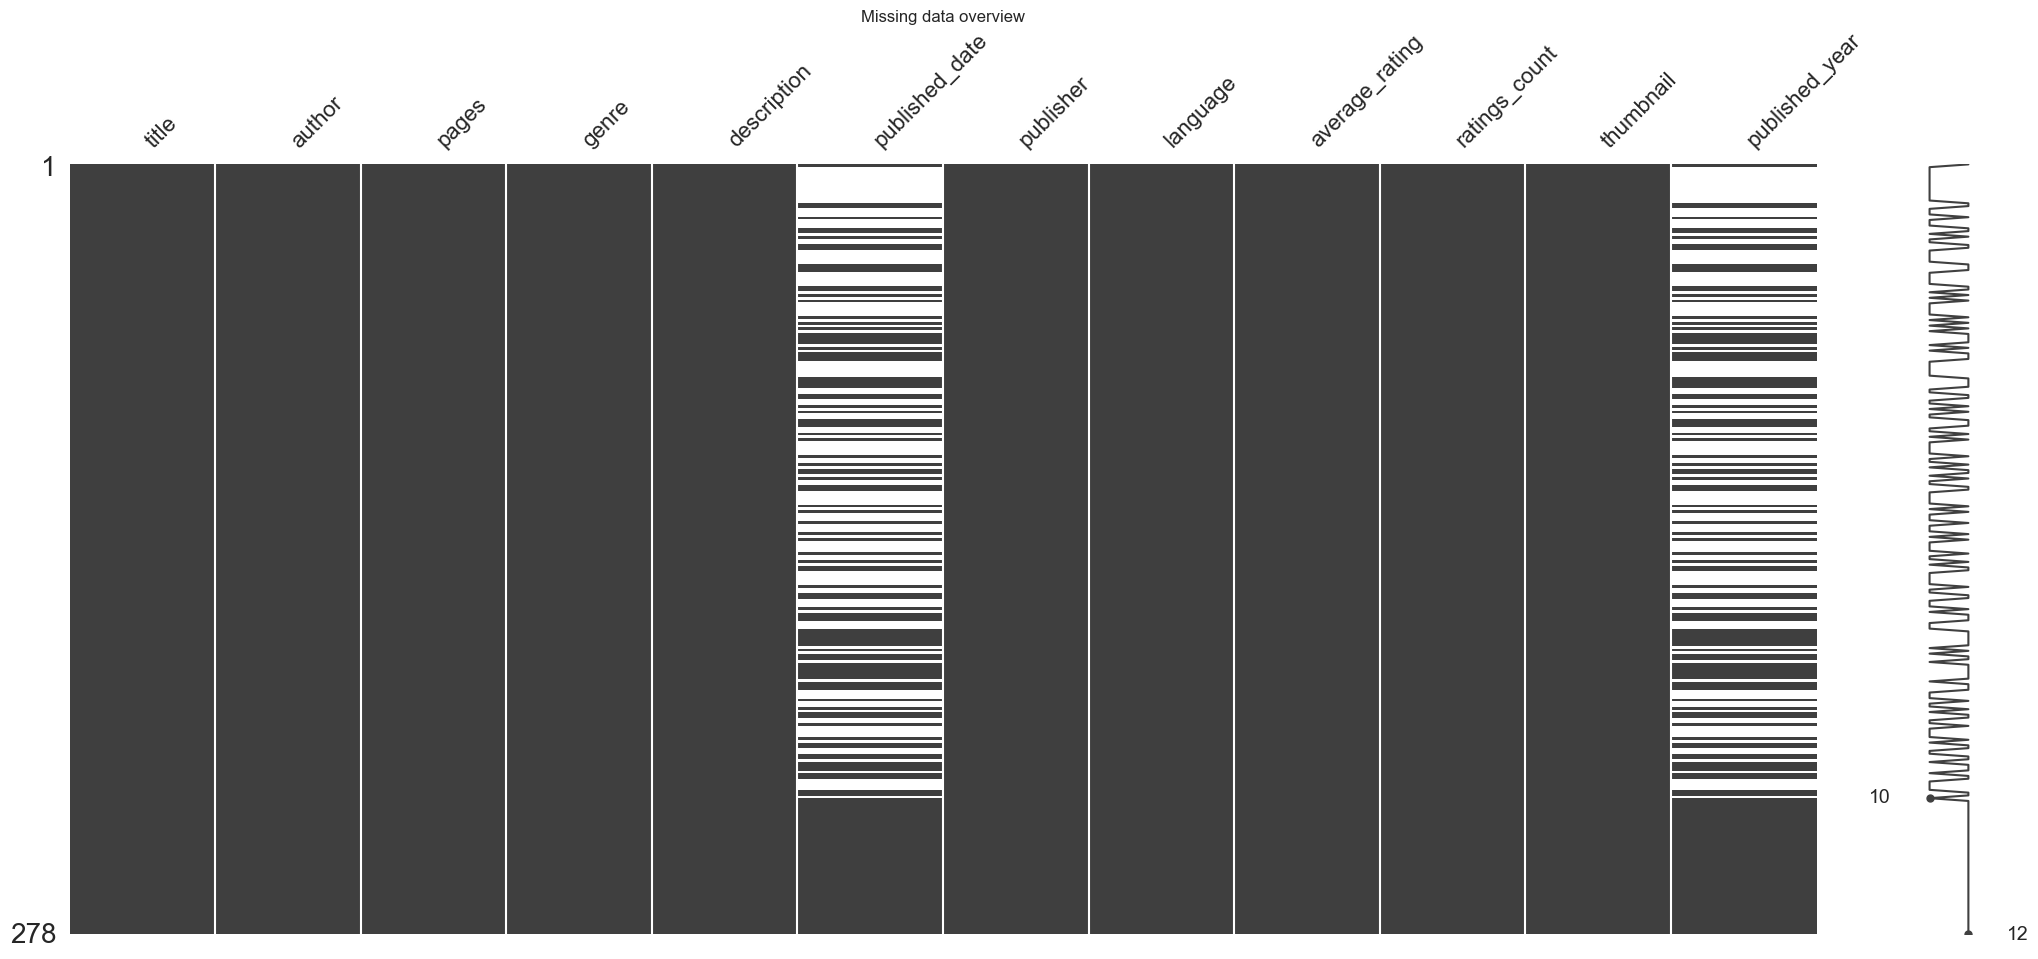

In [154]:
#check for missing data

msno.matrix(df)
plt.title('Missing data overview')
plt.show()

In [155]:
df['published_date']

12     2014-04-08
31            NaT
40            NaT
41            NaT
42            NaT
          ...    
2044   2016-01-05
2045   2001-04-01
2046   2004-12-28
2047   1999-03-01
2048   2023-05-16
Name: published_date, Length: 278, dtype: datetime64[ns]

In [156]:
#drop some columns not useful for analysis

df = df.drop(columns= ['thumbnail'])
df.head()

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,published_year
12,Encyclopedia of the Novel,Paul Schellinger,838.0,Literary Criticism,The Encyclopedia of the Novel is the first ref...,2014-04-08,Routledge,en,3.0,2,2014
31,The Bohemian,Unknown Author,896.0,Unknown Genre,No description available,NaT,Unknown Publisher,en,5.0,1,None
40,Popular Science,Unknown Author,122.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,4,None
41,Popular Science,Unknown Author,134.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,4.0,2,None
42,Popular Science,Unknown Author,290.0,Unknown Genre,Popular Science gives our readers the informat...,NaT,Unknown Publisher,en,5.0,2,None


In [157]:
df.tail()

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,published_year
2044,The Index Card,"Helaine Olen, Harold Pollack",256.0,Personal Finance,Simplifies personal finance to ten rules that ...,2016-01-05,Portfolio,en,4.0,30000,2016
2045,The Road to Wealth,Suze Orman,608.0,Personal Finance,"A comprehensive guide to managing money, inves...",2001-04-01,Riverhead Books,en,4.1,50000,2001
2046,The Success Principles,Jack Canfield,512.0,Self-Help,A guide to achieving personal and financial su...,2004-12-28,HarperCollins,en,4.2,100000,2004
2047,The Courage to Be Rich,Suze Orman,448.0,Personal Finance,Combines emotional and practical advice for bu...,1999-03-01,Riverhead Books,en,4.0,40000,1999
2048,The Money Manual,Tonya Rapley,256.0,Personal Finance,"A millennial-focused guide to budgeting, savin...",2023-05-16,Adams Media,en,4.2,20000,2023


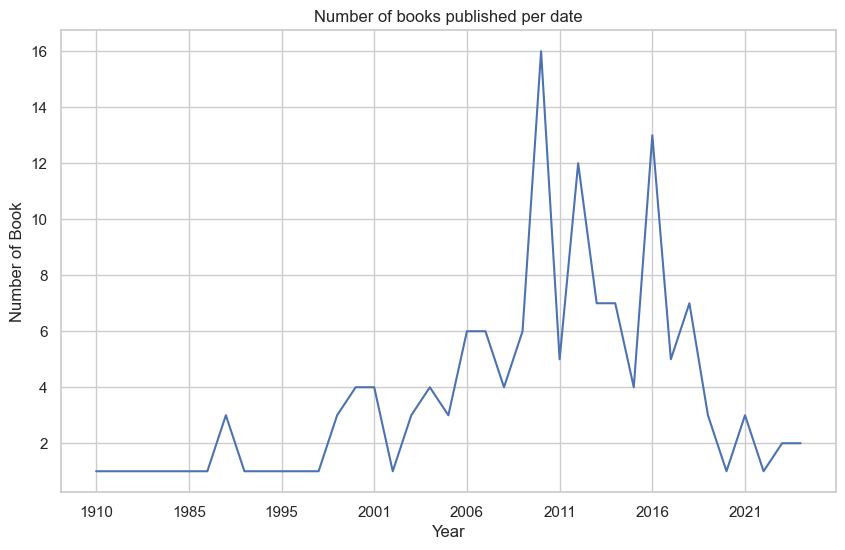

In [158]:
#5.Exploratory Data analysis (EDA)
#number of book

books_per_year = df['published_year'].value_counts().sort_index()
books_per_year.plot(kind='line', mark_right='0', title='Number of books published per date')

plt.xlabel('Year')
plt.ylabel('Number of Book')
plt.show()

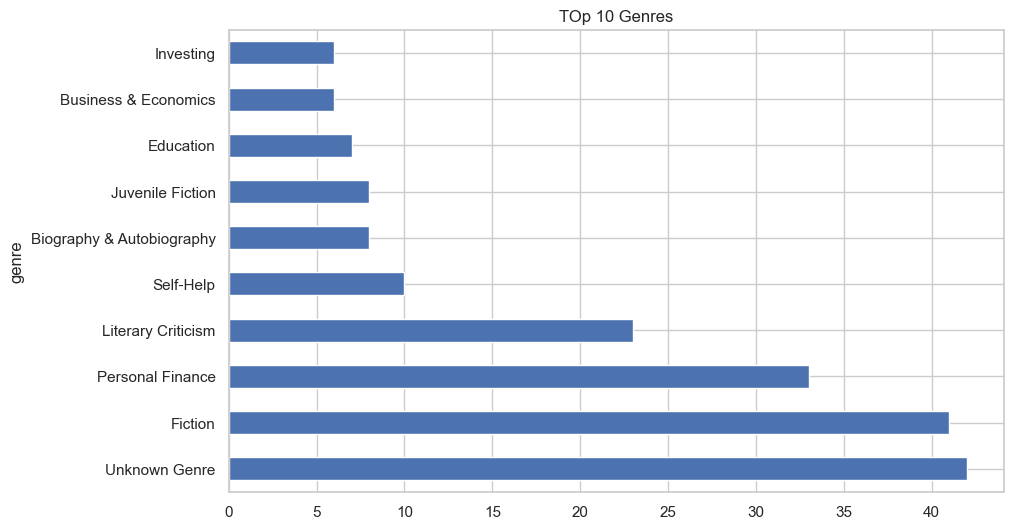

In [159]:
#most common genres

df['genre'].value_counts().head(10).plot(kind='barh', title='TOp 10 Genres')
plt.xlabel = ('Count')
plt.ylabel = ('Genres')
plt.show()

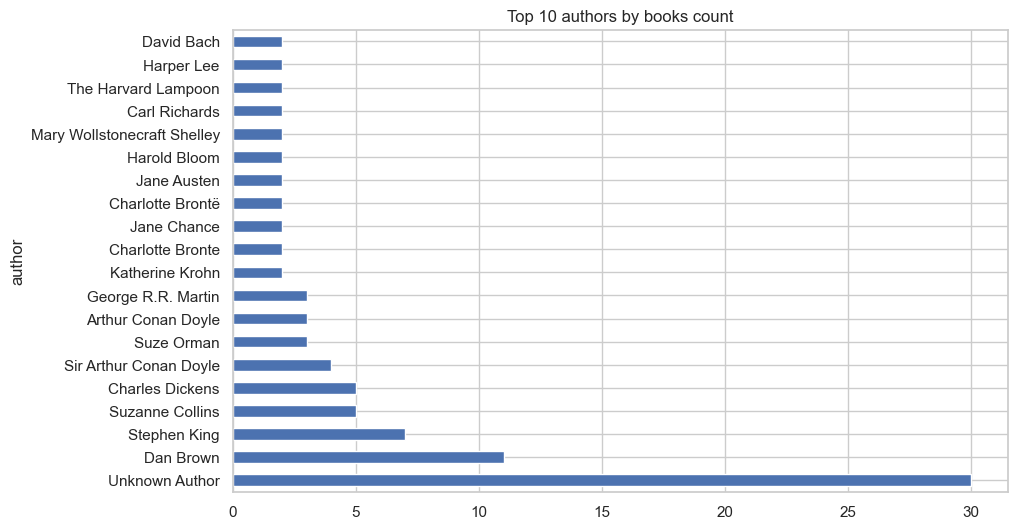

In [162]:
#top authors by number of books

df['author'].value_counts().head(20).plot(kind='barh',title='Top 10 authors by books count')

plt.xlabel = ('Books')
plt.show()

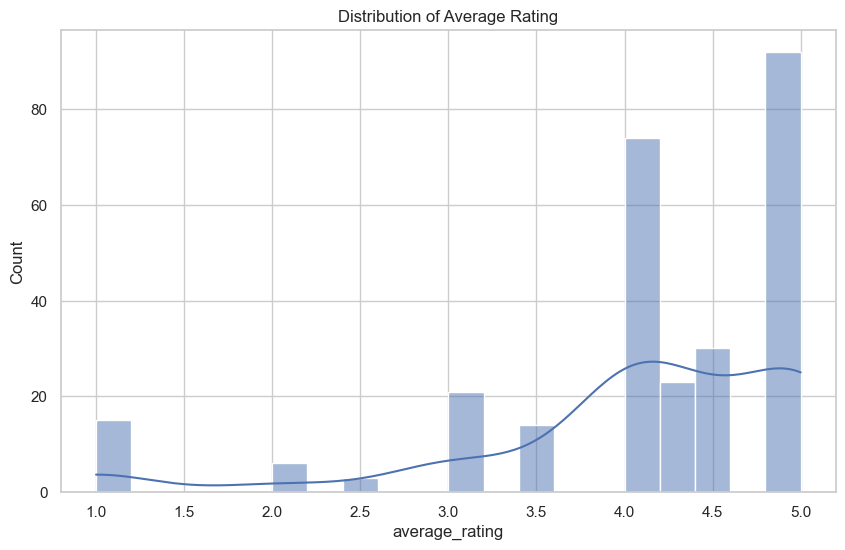

In [168]:
#Distribution of average ratings

sns.histplot(df['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Rating')

plt.show()

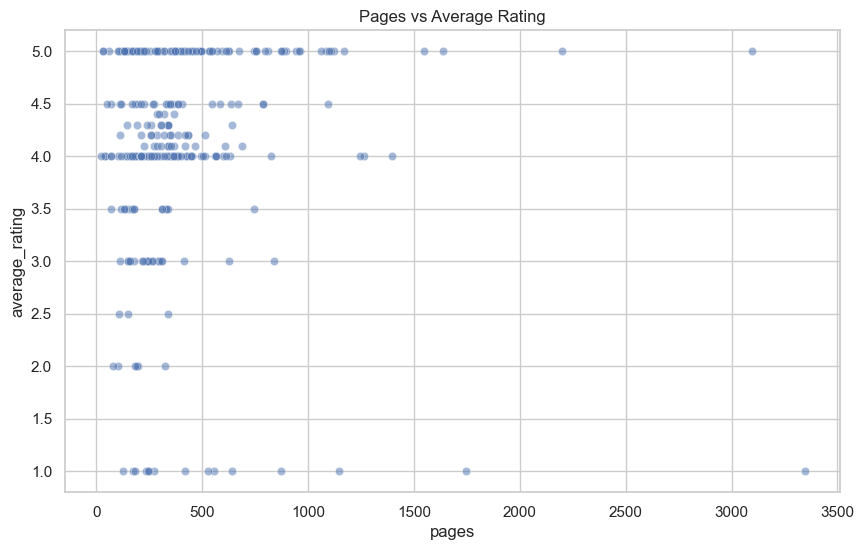

In [171]:
#page vs rating

sns.scatterplot(data=df, x='pages', y='average_rating', alpha = 0.5)
plt.title('Pages vs Average Rating')
plt.show()

In [173]:
#highly rated books with enough reviews

top_books = df[df['ratings_count'] > 50].sort_values(by = 'average_rating', ascending= False).head(10)
top_books[['title','author','average_rating','ratings_count']]

,title,author,average_rating,ratings_count
1019,Adventures of Sherlock Holmes,Sir Arthur Conan Doyle,4.5,486
1020,The Hunger Games,Suzanne Collins,4.5,333
2017,The Barefoot Investor,Scott Pape,4.4,100000
2012,The Simple Path to Wealth,JL Collins,4.4,80000
2008,Atomic Habits,James Clear,4.4,700000
2013,Get Good with Money,Tiffany Aliche,4.4,50000
2040,The Wealth Choice,Dennis Kimbro,4.3,20000
2015,The Millionaire Fastlane,MJ DeMarco,4.3,90000
2036,The Compound Effect,Darren Hardy,4.3,90000
2009,The Richest Man in Babylon,George S. Clason,4.3,400000
